<a href="https://colab.research.google.com/github/vinay5751/dog_vs_cat_calssification_by_CNN/blob/master/Dogs_Vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()#Upload Your Kaggle API Json File
"Creating .kaggke Folder"""
!mkdir -p ~/.kaggle
"""Copying kaggle.json File To .kaggle"""
!cp kaggle.json ~/.kaggle/
"""Changing Access Mode Of File"""
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 95% 257M/271M [00:04<00:00, 59.2MB/s]
100% 271M/271M [00:04<00:00, 66.5MB/s]
 99% 540M/544M [00:07<00:00, 80.4MB/s]
100% 544M/544M [00:07<00:00, 72.9MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 98.2MB/s]


In [3]:
'''Extracting Downloaded File'''
from zipfile import ZipFile
file_name = "/content/train.zip"

with ZipFile(file_name,"r") as zip:
    zip.extractall()
    print("Train Extraction Done")
    
file_name = "/content/test.zip"

with ZipFile(file_name,"r") as zip:
    zip.extractall()
    print("Test Extraction Done")

Train Extraction Done
Test Extraction Done


In [0]:
import numpy as np  #LINEAR ALGEBRA
import pandas as pd #DATA PREPROCESSING

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os
print(os.listdir("/content"))

IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 #RGB

In [0]:
filenames = os.listdir("/content/train")

category = []

for filename in filenames:
    
    label = filename.split(".")[0]
    
    if label == "dog":
        category.append(1)
    else:
        category.append(0)

In [0]:
df = pd.DataFrame({"Filename":filenames,
                   "Category":category})

df = df[["Filename","Category"]]

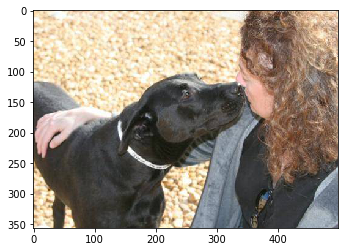

In [7]:
sample = random.choice(filenames)
image = load_img("/content/train/"+sample)
plt.imshow(image)

In [0]:
train_df , validation_df = train_test_split(df,test_size = 0.20,random_state = 42)

In [9]:
print(train_df.count(),"\n",validation_df.count())

Filename    20000
Category    20000
dtype: int64 
 Filename    5000
Category    5000
dtype: int64


In [0]:
train_df = train_df.reset_index(drop=True) #reset index again
validation_df = validation_df.reset_index(drop=True)

In [0]:
total_train = train_df.shape[0]
total_validate = validation_df.shape[0]
batch_size=15

In [0]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

In [0]:
train_df["Category"] = train_df['Category'].astype("str")

In [14]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory="/content/train",
                                                    x_col="Filename",
                                                    y_col="Category",
                                                    target_size=IMAGE_SIZE,
                                                    class_mode="categorical",
                                                    batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [0]:
validation_df["Category"] = validation_df['Category'].astype("str")

In [16]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validation_df,
                                                              "/content/train",
                                                              x_col='Filename',
                                                              y_col='Category',
                                                              target_size=IMAGE_SIZE,
                                                              class_mode="categorical",
                                                              batch_size=batch_size
                                                             )

Found 5000 images belonging to 2 classes.


In [17]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(  example_df, 
                                                        "/content/train", 
                                                        x_col='Filename',
                                                        y_col='Category',
                                                        target_size=IMAGE_SIZE,
                                                        
                                                     )

Found 1 images belonging to 1 classes.


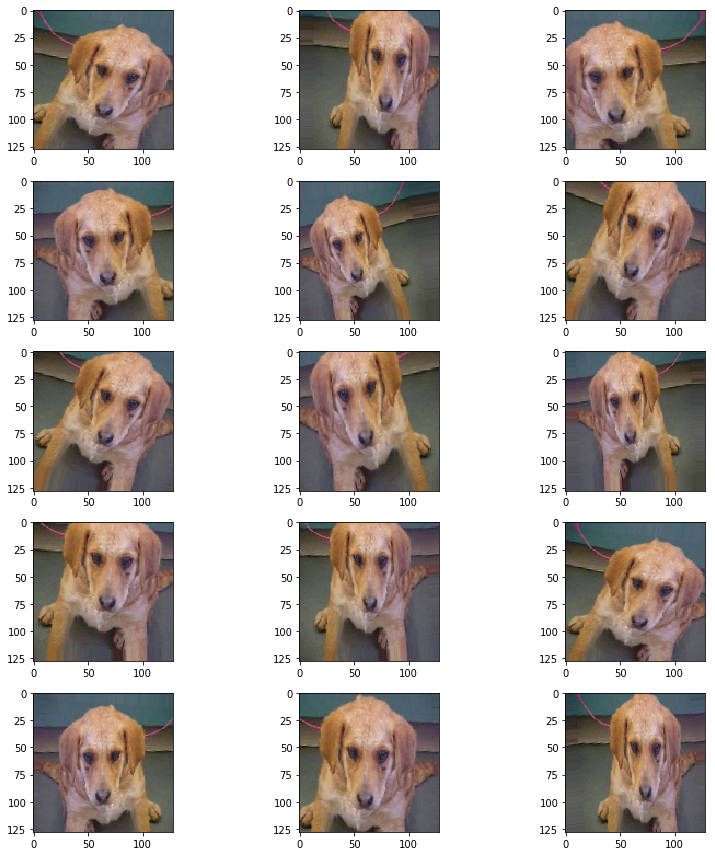

In [18]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [0]:
model = Sequential()

In [21]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [0]:
earlystop = EarlyStopping(patience=10)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

In [27]:
history = model.fit_generator(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/20
1333/1333 [==============================] - 223s 167ms/step - loss: 0.6937 - acc: 0.4960 - val_loss: 0.6928 - val_acc: 0.5170
Epoch 2/20
1333/1333 [==============================] - 216s 162ms/step - loss: 0.6854 - acc: 0.5526 - val_loss: 0.6761 - val_acc: 0.5709
Epoch 3/20
1333/1333 [==============================] - 220s 165ms/step - loss: 0.6728 - acc: 0.5827 - val_loss: 0.7089 - val_acc: 0.5342
Epoch 4/20
1333/1333 [==============================] - 261s 195ms/step - loss: 0.6597 - acc: 0.6132 - val_loss: 0.6259 - val_acc: 0.6528
Epoch 5/20
1333/1333 [==============================] - 330s 248ms/step - loss: 0.6239 - acc: 0.6549 - val_loss: 0.5623 - val_acc: 0.7278
Epoch 6/20
1333/1333 [==============================] - 331s 249ms/step - loss: 0.5870 - acc: 0.6956 - val_loss: 0.5861 - val_acc: 0.6891
Epoch 7/20
1333/1333 [==============================] - 231s 173ms/step - loss: 0.5610 - acc: 0.7158 - val_loss: 0.4763 - val_acc: 0.7856
Epoch 8/20
1333/1333 [============

In [0]:
model.save_weights("model.h5")

In [0]:
epochs=20

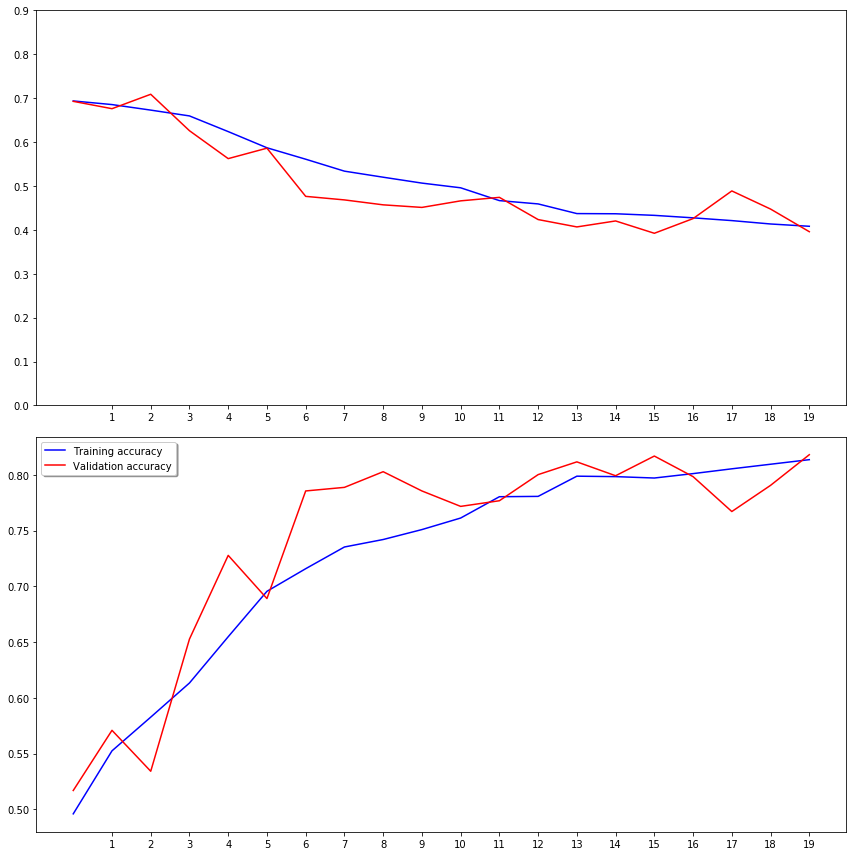

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
test_filenames = os.listdir("/content/test")
test_df = pd.DataFrame({
    'Filename': test_filenames
})
nb_samples = test_df.shape[0]

In [32]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df,"/content/test",
                                              x_col='Filename',
                                              y_col=None,
                                              class_mode=None,
                                              target_size=IMAGE_SIZE,
                                              batch_size=batch_size,
                                              shuffle=False
                                             )

Found 12500 images.


In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [34]:
predict

array([[0.9970559 , 0.00294408],
       [0.88959104, 0.11040893],
       [0.97059107, 0.02940893],
       ...,
       [0.05443433, 0.9455657 ],
       [0.24300954, 0.7569905 ],
       [0.37652567, 0.62347436]], dtype=float32)

In [0]:
threshold = 0.5
test_df['probability'] = list(predict)
test_df['category'] = test_df["probability"].apply(max)

    Filename                 probability  category
0   6032.jpg   [0.9970559, 0.0029440788]  0.997056
1  10037.jpg    [0.88959104, 0.11040893]  0.889591
2    775.jpg    [0.97059107, 0.02940893]  0.970591
3   7303.jpg     [0.8991607, 0.10083936]  0.899161
4   2512.jpg  [0.9998853, 0.00011469043]  0.999885


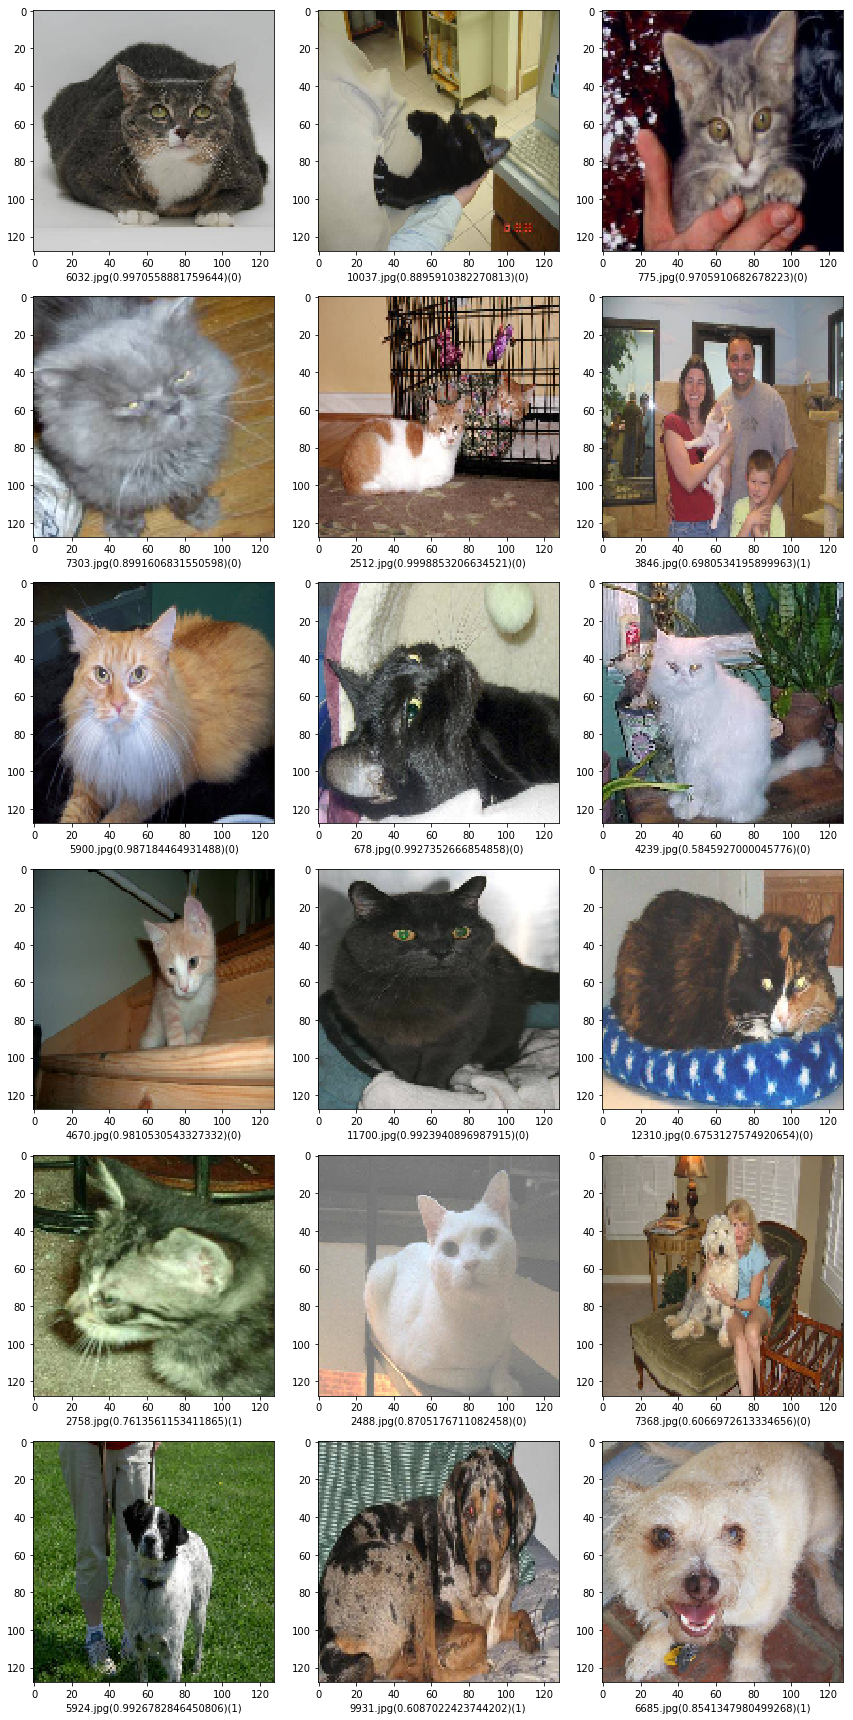

In [41]:
sample_test = test_df.head(18)
print(sample_test.head())
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Filename']
    category = row['category']
    probability = row['probability']
    img = load_img("/content/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' '(' + "{}".format(probability.argmax()) + ')')
plt.tight_layout()
plt.show()